# Abertura - Dados qualitativos e quantitativos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy as sci

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/CURSOS TECNOLOGIA/ALURA/4 - Estatística com Python: Freq e Med/dados/dados.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [ ]:
df['Altura'] = df.Altura.round(2)
df.head(3)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.60
1,11,1,23,2,12,1150,1.74
2,11,1,35,8,15,880,1.76


In [ ]:
print('De %s até %s anos' % (df.Idade.min(), df.Idade.max()))

De 13 até 99 anos


# Distribuição de frequência


In [ ]:
# 1 - Distribuição de frequências para variáveis qualitativas.

In [ ]:
freq = df['Sexo'].value_counts()
freq

0    53250
1    23590
Name: Sexo, dtype: int64

In [ ]:
df['Sexo'].value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [ ]:
dist = (df['Sexo'].value_counts(normalize = True) * 100).round(2)
dist

0    69.3
1    30.7
Name: Sexo, dtype: float64

In [ ]:
dist_freq_qualitativas = pd.DataFrame({'Frequencia': freq, 'Distribuicao(%)': dist})
dist_freq_qualitativas.rename(index={0:'Masculino',1:'Feminino'}, inplace = True)
#df.rename?
dist_freq_qualitativas

,Frequencia,Distribuicao(%)
Masculino,53250,69.3
Feminino,23590,30.7


In [ ]:
# 2 - Distribuição de frequências para variáveis qualitativas.

In [ ]:
sexo = {0: 'Masculino',
        1: 'Feminino'}
cor = {0:'Indígena',
       2: 'Branca',
       4: 'Preta', 
       6: 'Amarela',
       8:'Parda',
       9: 'Sem declaração'}

In [ ]:
freq = pd.crosstab(df.Sexo, df.Cor)
freq.rename(index = sexo, columns = cor, inplace = True)
freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
dist = (pd.crosstab(df.Sexo, df.Cor, normalize = True) * 100).round(2)
dist.rename(index = sexo, columns = cor, inplace = True)
dist

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


In [ ]:
teste = pd.crosstab(df.Sexo, df.Cor, values = df.Renda, aggfunc='mean', normalize=True) *100
teste.rename(index=sexo, columns=cor, inplace=True)
teste

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,4.929843,13.333934,7.309519,21.685491,7.563441
Feminino,11.231316,9.615612,5.170866,13.796959,5.363018


In [ ]:
# 1 - Distribuição de frequências para variáveis quantitativas.

In [ ]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.60,E
1,11,1,23,2,12,1150,1.74,E
2,11,1,35,8,15,880,1.76,E
3,11,0,46,2,6,3500,1.78,C
4,11,1,47,8,9,150,1.69,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.69,E
76836,53,0,30,4,7,1500,1.79,E
76837,53,0,32,8,12,1300,1.83,E
76838,53,0,57,8,4,1500,1.73,E


In [ ]:
# maneira que eu fiz.

In [ ]:
classe = []

for item in list(df['Renda'].values): 
  if item <= 700:
    classe.append('Baixa')
  if item >= 3000:
    classe.append('Alta')
  else:
    classe.append('Média')

In [ ]:
df['Classe'] = pd.Series(classe)
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.60,Média
1,11,1,23,2,12,1150,1.74,Média
2,11,1,35,8,15,880,1.76,Média
3,11,0,46,2,6,3500,1.78,Alta
4,11,1,47,8,9,150,1.69,Baixa
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.69,Média
76836,53,0,30,4,7,1500,1.79,Alta
76837,53,0,32,8,12,1300,1.83,Baixa
76838,53,0,57,8,4,1500,1.73,Média


In [ ]:
df['Classe'].value_counts()

Média    53465
Baixa    13453
Alta      9922
Name: Classe, dtype: int64

In [ ]:
(df['Classe'].value_counts(normalize=True)*100).round(2)

Média    69.58
Baixa    17.51
Alta     12.91
Name: Classe, dtype: float64

In [ ]:
df.drop(columns= ['Classe'])

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.60
1,11,1,23,2,12,1150,1.74
2,11,1,35,8,15,880,1.76
3,11,0,46,2,6,3500,1.78
4,11,1,47,8,9,150,1.69
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.69
76836,53,0,30,4,7,1500,1.79
76837,53,0,32,8,12,1300,1.83
76838,53,0,57,8,4,1500,1.73


In [ ]:
# método 1  da aula

In [ ]:
classes = [0,1576,3152,7880,15760,200000]
labels = ['E','D','C','B','A']

In [ ]:
Cl = pd.cut(x = df.Renda, bins = classes, labels = labels, include_lowest = True)
Cl

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
df['Classe'] = Cl
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.60,E
1,11,1,23,2,12,1150,1.74,E
2,11,1,35,8,15,880,1.76,E
3,11,0,46,2,6,3500,1.78,C
4,11,1,47,8,9,150,1.69,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.69,E
76836,53,0,30,4,7,1500,1.79,E
76837,53,0,32,8,12,1300,1.83,E
76838,53,0,57,8,4,1500,1.73,E


In [ ]:
df['Classe'].value_counts()

E    49755
D    16700
C     7599
B     2178
A      608
Name: Classe, dtype: int64

In [ ]:
(df['Classe'].value_counts(normalize=True) * 100 ).round(2)

E    64.75
D    21.73
C     9.89
B     2.83
A     0.79
Name: Classe, dtype: float64

In [ ]:
freq_dist = pd.DataFrame({'Freq':df['Classe'].value_counts(),'Dist(%)':(df['Classe'].value_counts(normalize=True) * 100 ).round(2)})
freq_dist.sort_index(ascending=False, inplace=True)
freq_dist.reset_index(inplace=True)
freq_dist.rename(columns={'index':'Classe'}, inplace=True)
freq_dist

,Classe,Freq,Dist(%)
0,A,608,0.79
1,B,2178,2.83
2,C,7599,9.89
3,D,16700,21.73
4,E,49755,64.75


In [ ]:
# método 2  da aula

## Histograma

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


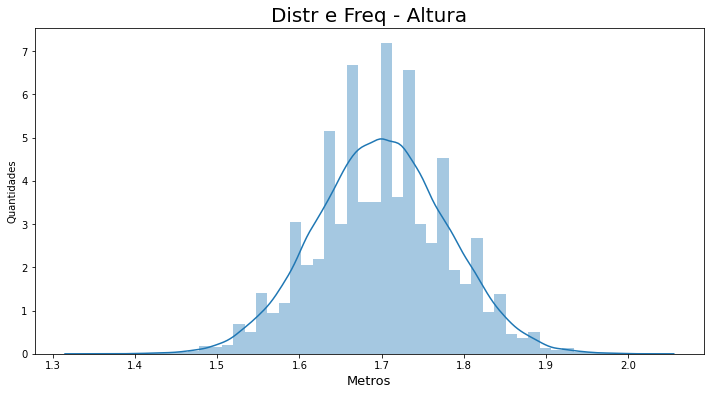

In [ ]:
ax = sns.distplot(df.Altura)
ax.figure.set_size_inches(12,6)
ax.set_title('Distr e Freq - Altura', fontsize=20)
ax.set_xlabel('Metros',fontsize=13)
ax.set_ylabel('Quantidades')
ax

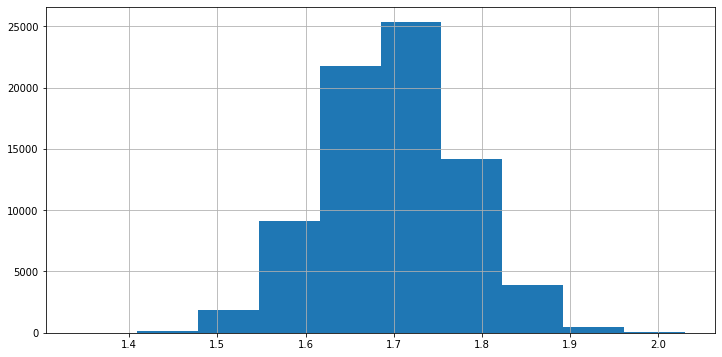

In [ ]:
df.Altura.hist(figsize=(12,6)) #do próprio pandas

In [ ]:
freq_dist

,Classe,Freq,Dist(%)
0,A,608,0.79
1,B,2178,2.83
2,C,7599,9.89
3,D,16700,21.73
4,E,49755,64.75


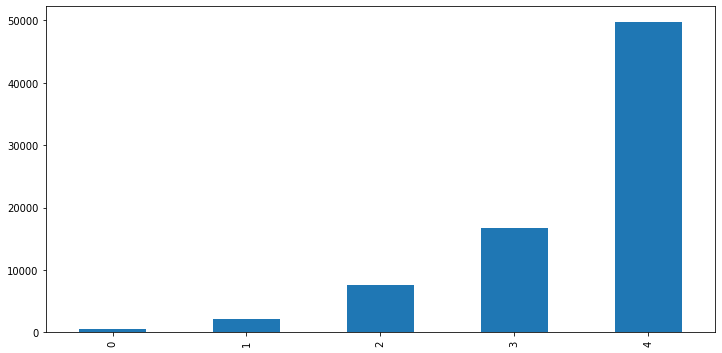

In [ ]:
freq_dist['Freq'].plot.bar(figsize=(12,6))

# Medidas de tendência central

## Média

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/gdrive/MyDrive/CURSOS TECNOLOGIA/ALURA/4 - Estatística com Python: Freq e Med/dados/dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
dados['Idade'].mean().round(2)

44.07

In [ ]:
dados.Renda.mean().round(2)

2000.38

In [ ]:
dados.groupby('Sexo')['Renda'].mean().round(2)

Sexo
0    2192.44
1    1566.85
Name: Renda, dtype: float64

In [ ]:
# type(dados.groupby('Sexo')['Renda'].mean().round(2))
test = dados.groupby('Sexo')['Renda'].mean().round(2)
test = pd.DataFrame(test)
test.rename(index={0:'Masculino',1:'Feminino'}, columns={'Renda':'Renda Média por Sexo'}, inplace=True)
test

,Renda Média por Sexo
Sexo,
Masculino,2192.44
Feminino,1566.85


In [ ]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [ ]:
dataset['Idade'].mean()

46.1

In [ ]:
dataset.groupby('Sexo')["Idade"].mean().round(2)

Sexo
H    45.75
M    46.33
Name: Idade, dtype: float64

## Mediana

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
dados['Renda'].median()

1200.0

In [ ]:
dados['Renda'].quantile()

1200.0

## Moda

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
dados['Idade'].mode()

0    40
dtype: int64

In [ ]:
dados['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [ ]:
dados['Renda'].mode()

0    788
dtype: int64

## Avaliando a Renda e Altura

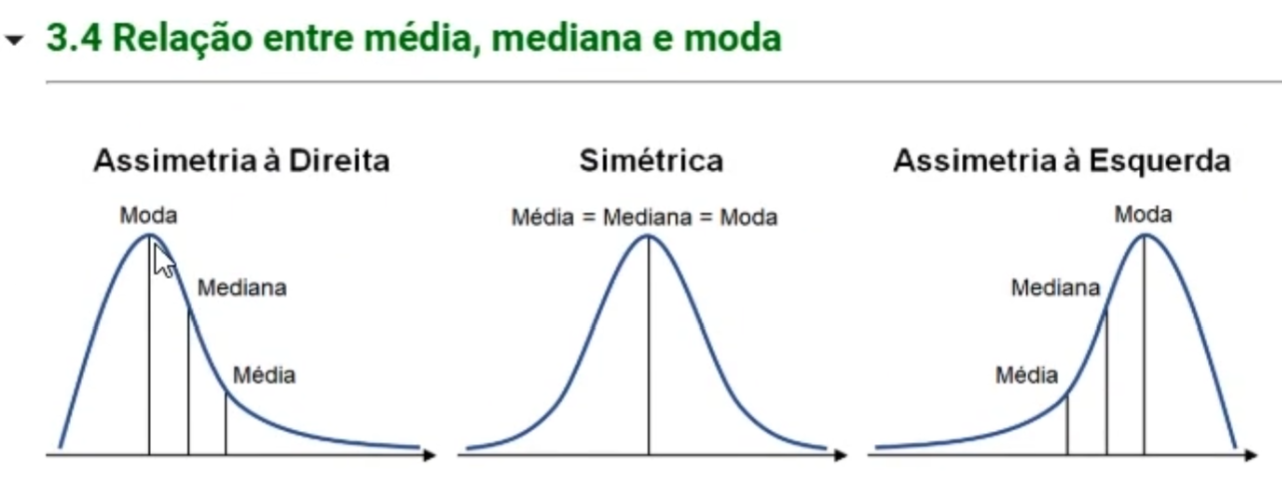

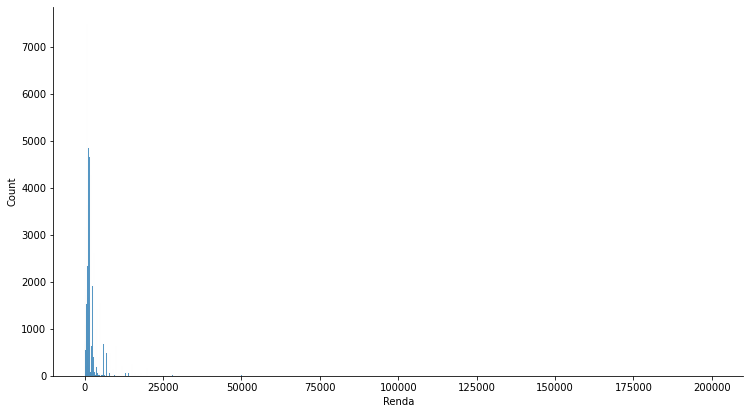

In [9]:
ax = sns.displot(df.Renda)
ax.figure.set_size_inches(12,6)
ax

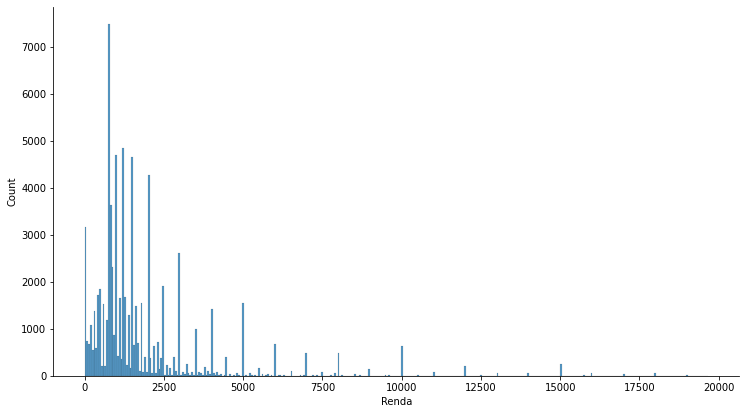

In [11]:
ax = sns.displot(df.query(' Renda < 20000').Renda)
ax.figure.set_size_inches(12,6)
ax

In [14]:
df.Renda.mode()

0    788
dtype: int64

In [15]:
df.Renda.median()

1200.0

In [16]:
df['Renda'].mean()

2000.3831988547631

In [ ]:
# Assimetria á direita Moda < Mediana < Media

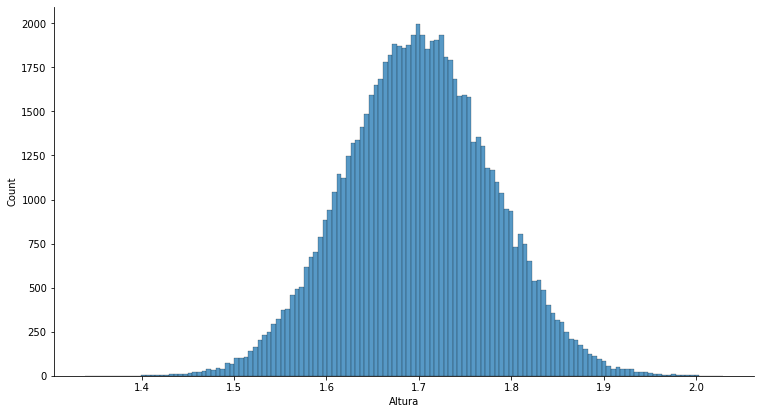

In [17]:
ax = sns.displot(df.Altura)
ax.figure.set_size_inches(12,6)
ax

In [36]:
print(f' Média: {df.Altura.mean().round(2)},\n\n Mediana: {df.Altura.median().round(2)},\n\n Moda: \n{df.Altura.mode().round(2)}')

 Média: 1.7,

 Mediana: 1.7,

 Moda: 
0    1.57
1    1.67
2    1.68
3    1.69
4    1.71
5    1.71
6    1.75
7    1.78
8    1.80
dtype: float64


# Medidas separatrizes

Quartis(divide em 4 partes), Decis(divide em 10 partes), Percentis(divide em 100 partes)

In [43]:
df.Renda.quantile(0.8) # o valor que está em 80% dos dados.

2500.0

In [44]:
df.Renda.quantile(0.5) # o valor que está no meio dos dados, que é equivalente a mediana tbm.

1200.0

In [45]:
df.Renda.median()

1200.0

In [42]:
df.Renda.quantile([0.25,0.5,0.75]) #os quartis, sendo os valores que estão em 25%, 50% e 75% dos dados.

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [46]:
df.Renda.quantile(0.15) # isso mostra o valor que está em 15% dos dados, todos os valores abaixo de 15% são menores que 500.

500.0

In [49]:
df.Renda.quantile(0.13)

480.0

In [51]:
[i/10 for i in range(1,10)] # 9 divisores para criar 10 partes iguais, ou seja, um Decil.

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [50]:
df.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

## Box- Plot

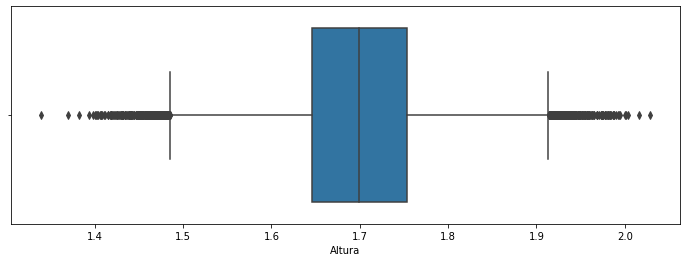

In [54]:
ax = sns.boxplot(x = 'Altura', data = df)
ax.figure.set_size_inches(12, 4)

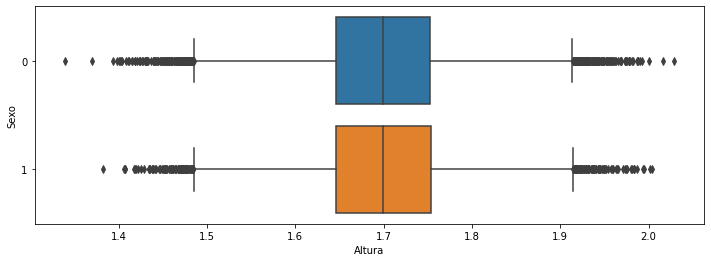

In [12]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)

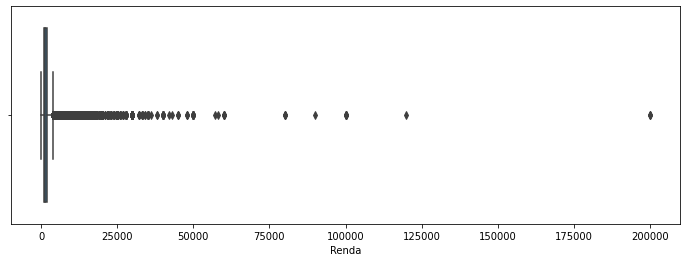

In [13]:
ax = sns.boxplot(x = 'Renda', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)

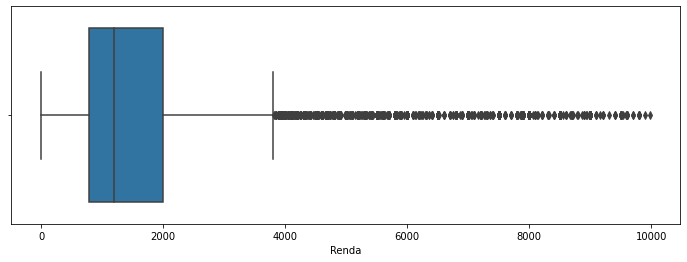

In [14]:
ax = sns.boxplot(x = 'Renda', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)

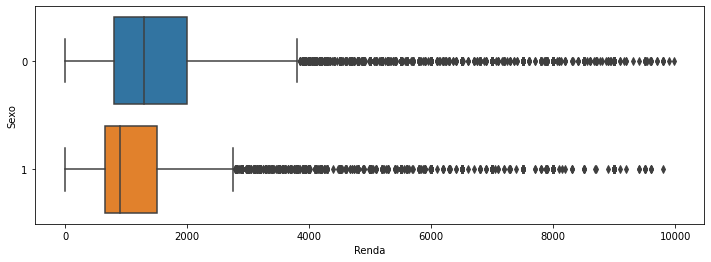

In [15]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)

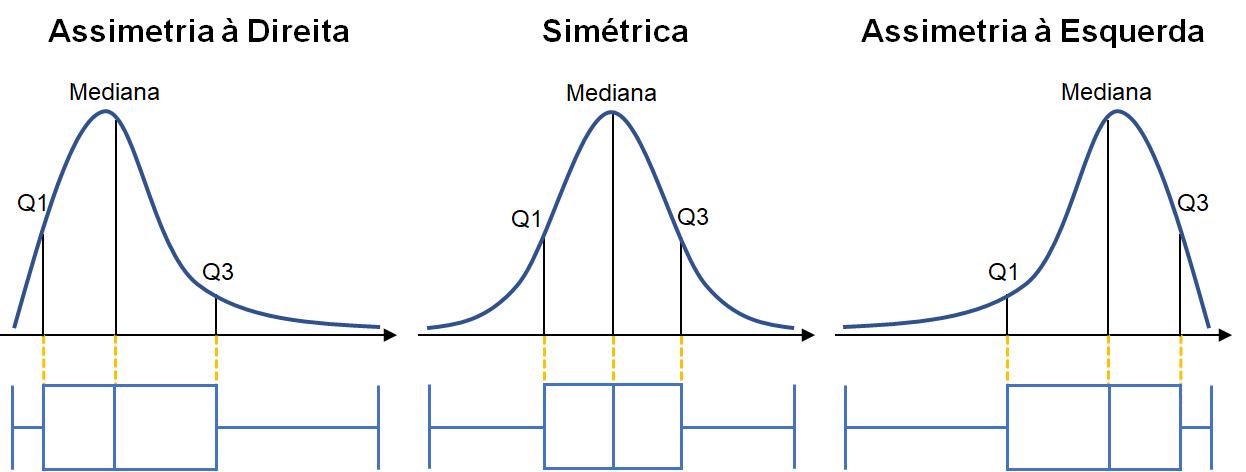

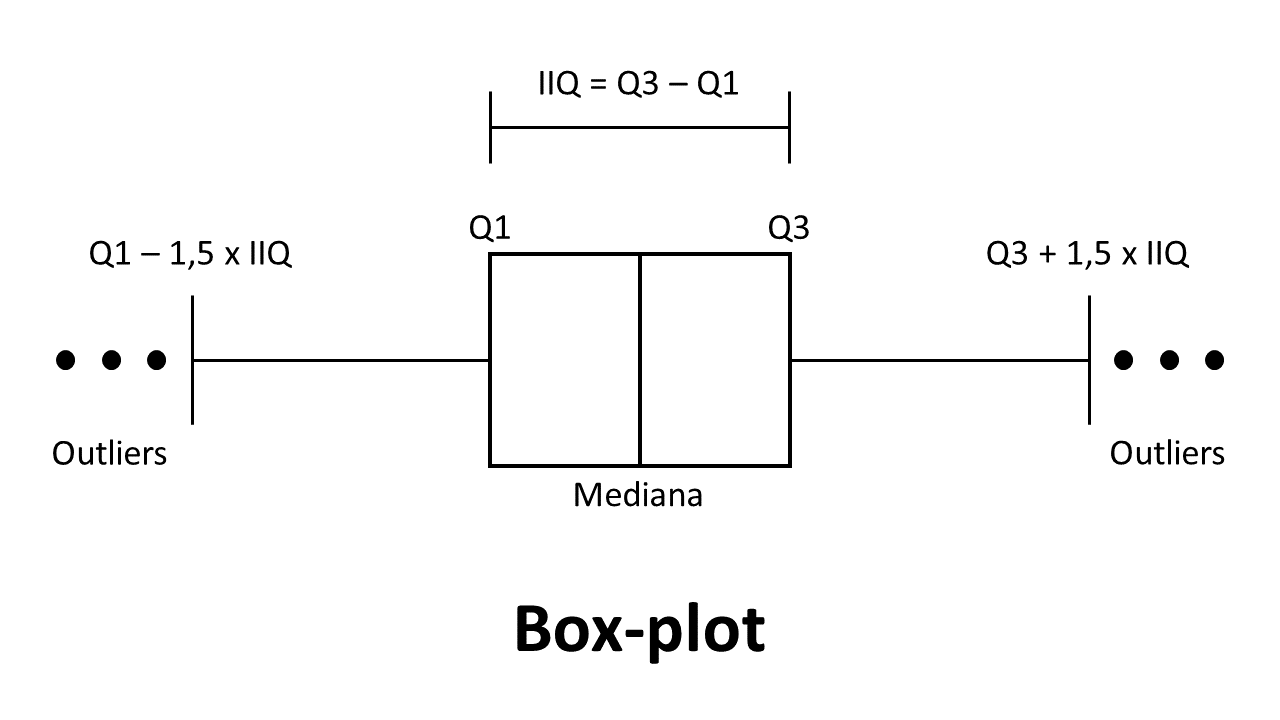

# Medidas de dispersão

## Desvio Médio Absoluto

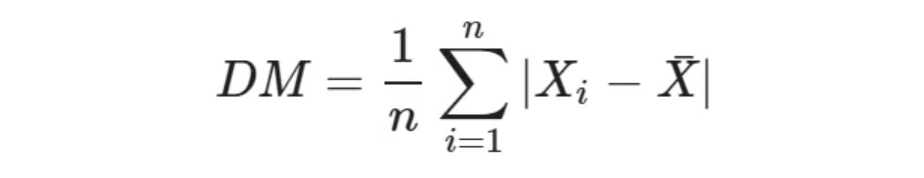

In [ ]:
# Xi = cada valor individual, X_ = a média de cada valor dentro de | x | pq só quer o número absoluto, ignorando o sinal.
# Observamos que a média e a mediana de Fulano e Sicrano são iguais, porém ao olharmos as notas.. vemos que Sicrano é constante, Fulano não.
# Portanto, essas estatísticas não mostram o comportamento com tanta profundidade. 
# O Desvio Médio ira mostrar a variância entre eles, mostrando a constância de um e a dispersão do outro.
# Enquanto as estatísticas mean, median e moda são medidas de tendência central... As medidas de dispersão mostram a tendência da dispersão.

In [42]:
dados = {'Materias': ['Matematica','Portugues','Ingles','Geografia','Historia','Fisica','Quimica'],
         'Beltrano': [10,2,0.5,1,3,9.5,10],
         'Fulano': [8,10,4,8,6,10,8],
         'Sicrano': [7.5,8,7,8,8,8.5,7]}
dados

{'Materias': ['Matematica',
  'Portugues',
  'Ingles',
  'Geografia',
  'Historia',
  'Fisica',
  'Quimica'],
 'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
 'Fulano': [8, 10, 4, 8, 6, 10, 8],
 'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}

In [43]:
dados = pd.DataFrame(dados)
dados = dados.set_index('Materias')
dados

,Beltrano,Fulano,Sicrano
Materias,,,
Matematica,10.0,8,7.5
Portugues,2.0,10,8.0
Ingles,0.5,4,7.0
Geografia,1.0,8,8.0
Historia,3.0,6,8.0
Fisica,9.5,10,8.5
Quimica,10.0,8,7.0


In [44]:
pd.DataFrame?

In [45]:
print(f'Média Fulano:{dados.Fulano.mean().round(2)}')
print(f'Mediana Fulano: {dados.Fulano.median().round(2)}')
print(f'\nMédia Sicrano:{dados.Sicrano.mean().round(2)}')
print(f'Mediana Sicrano:{dados.Sicrano.median().round(2)}') 
print('\nPossuem a mesma média e mediana... porém, ao observar os dados, vemos que um é constante nas notas e o outro é disperso.')
print('Pra isso que as medidas de dispersão servem, pra mostrar o quão distantes e inconstantesestão os dados.')

Média Fulano:7.71
Mediana Fulano: 8.0

Média Sicrano:7.71
Mediana Sicrano:8.0

Possuem a mesma média e mediana... porém, ao observar os dados, vemos que um é constante nas notas e o outro é disperso.
Pra isso que as medidas de dispersão servem, pra mostrar o quão distantes e inconstantesestão os dados.


In [46]:
# Xi = cada valor individual, X_ = a média de cada valor dentro de | x | pq só quer o número absoluto, ignorando o sinal.
# para ter o desvio.
dados.Fulano
X_ = dados.Fulano.mean()
X_

7.714285714285714

In [47]:
# Xi = 
dados[['Fulano']] 

,Fulano
Materias,
Matematica,8
Portugues,10
Ingles,4
Geografia,8
Historia,6
Fisica,10
Quimica,8


In [74]:
dv_Fulano = dados['Fulano']
dv_Fulano = pd.DataFrame(dv_Fulano)
dv_Fulano

,Fulano
Materias,
Matematica,8
Portugues,10
Ingles,4
Geografia,8
Historia,6
Fisica,10
Quimica,8


In [75]:
type(dv_Fulano)

pandas.core.frame.DataFrame

In [76]:
fulano_mean = dv_Fulano.mean().round(2)
fulano_mean

Fulano    7.71
dtype: float64

In [81]:
dv_Fulano['Desvio'] = (dados[['Fulano']] - fulano_mean)

In [82]:
dv_Fulano

,Fulano,Desvio
Materias,,
Matematica,8,0.29
Portugues,10,2.29
Ingles,4,-3.71
Geografia,8,0.29
Historia,6,-1.71
Fisica,10,2.29
Quimica,8,0.29


In [83]:
dv_Fulano['|Desvio|'] = (dados[['Fulano']] - fulano_mean).abs() # abs é a função que pega o valor absoluto, ignorando o sinal

In [84]:
dv_Fulano

,Fulano,Desvio,|Desvio|
Materias,,,
Matematica,8,0.29,0.29
Portugues,10,2.29,2.29
Ingles,4,-3.71,3.71
Geografia,8,0.29,0.29
Historia,6,-1.71,1.71
Fisica,10,2.29,2.29
Quimica,8,0.29,0.29


In [85]:
# então calculamos a média do desvio absoluto, e temos a média dos desvios das notas do Fulano.
dv_Fulano['|Desvio|'].mean()

1.5528571428571425

In [86]:
#  ou poderíamos simplesmente usar a função mad() que calcula a média do desvio absoluto.
dados.Fulano.mad()

1.5510204081632648

In [ ]:
# ----------------------------------

In [87]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


In [88]:
df['Fulano'].mad()

1.5510204081632648

In [89]:
df['Sicrano'].mad()

0.4693877551020408

In [ ]:
# --------------------------------------------

## Variância

In [ ]:
# a média dos desvios ao quadrado.

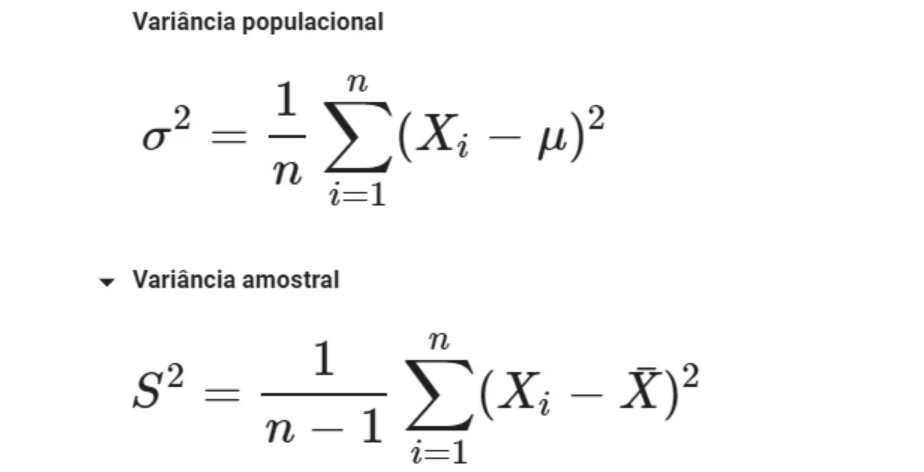

In [90]:
dv_Fulano['(Desvio)^2'] = dv_Fulano['Desvio'].pow(2) #função pow() para calcular elevado ao quadrado.
dv_Fulano

,Fulano,Desvio,|Desvio|,(Desvio)^2
Materias,,,,
Matematica,8,0.29,0.29,0.0841
Portugues,10,2.29,2.29,5.2441
Ingles,4,-3.71,3.71,13.7641
Geografia,8,0.29,0.29,0.0841
Historia,6,-1.71,1.71,2.9241
Fisica,10,2.29,2.29,5.2441
Quimica,8,0.29,0.29,0.0841


In [98]:
# e então, com os valores ao quadrado, calculamos a variância:
varian = dv_Fulano['(Desvio)^2'].sum() / (len(dv_Fulano)-1) #conforme a fórmula: a soma dos desvios ao quadrado, div pela quantidade - 1
varian

4.57145

In [97]:
# ou simplesmente usamos a fórmula:
dados['Fulano'].var()

4.57142857142857

## Desvio Padrão

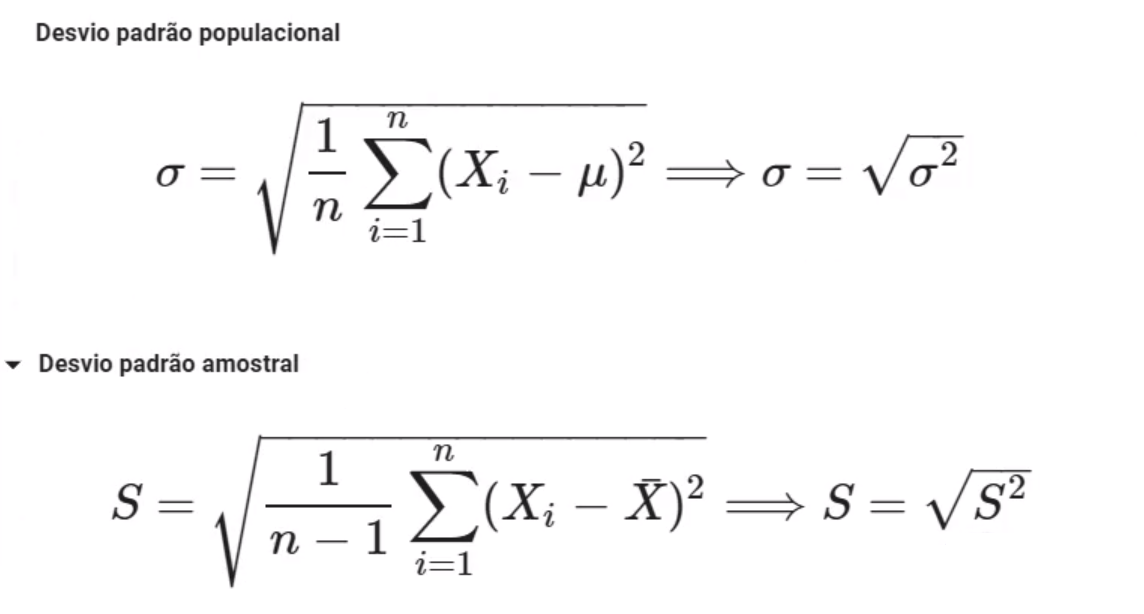

In [ ]:
# a raiz quadrada da variância, para corrigir a dificuldade de interpretação da variância que é a média ao quadrado.

In [99]:
np.sqrt(varian) #função numpy que calcula raiz quadrada.

2.138094946441808

In [101]:
dp_Fulano = dv_Fulano['Fulano'].std() #função que cálcula o desvio padrão.
dp_Fulano

2.1380899352993947

In [ ]:
#-------------------------

In [102]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [103]:
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [111]:
dataset['Idade'].std()

14.184890239656813

In [112]:
ds_h = dataset[(dataset['Sexo'] == 'H')]
ds_m = dataset[(dataset['Sexo'] == 'M')]

In [110]:
ds_h['Idade'].std()

11.89887949906769

In [113]:
ds_m['Idade'].std()

16.64531966249572

In [115]:
dataset.groupby(['Sexo']).std()

,Idade
Sexo,
H,11.898879
M,16.645320
